<a href="https://colab.research.google.com/github/SeokHwanJeong/DAP__/blob/main/DAP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 평론가와 네티즌의 영화 평점

##컴퓨터과학과 17학번 정석환


---




In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import warnings

# 2000 ~ 2021 영화
네이버 영화 디렉토리에서 2000~2021년도에 개봉한 영화들을 크롤링 했습니다.  
영화 출처 : https://movie.naver.com/movie/sdb/browsing/bmovie_open.naver

크롤링에는 Selenium을 사용했습니다.  
제가 작성한 영화 크롤링 코드는 주소를 올리겠습니다.  
https://github.com/SeokHwanJeong/DAP__/tree/main/project_movie


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SeokHwanJeong/DAP__/main/project_movie/movie_score.csv')
print("2000 ~ 2021 네이버에 등록된 영화의 수 : %d편"%len(df))
df.head()

2000 ~ 2021 네이버에 등록된 영화의 수 : 16647편


,영화 이름,개봉년도,관람객 평점,평론가 평점,네티즌 평점,평가한 관람객 수,평가한 평론가 수,평가한 네티즌 수
0,플레이 투 더 본,2000,NaN,NaN,5.20,0,0,5
1,걸 온 더 브릿지,2000,NaN,NaN,8.48,0,0,23
2,아트 오브 워,2000,NaN,NaN,7.30,0,0,83
3,비상 근무,2000,NaN,NaN,7.14,0,0,56
4,언피쉬,2000,NaN,NaN,9.20,0,0,5




---


# 결측값 제거
평점을 내린 평론가가 없는 영화는 값이 없습니다.

또한 관람객 평점은 네이버에서 영화를 예매하고, 관람한 고객들이 등록한 평점입니다.  
관람객 평점을 등록한 사람이 한 명도 없다면 값이 없습니다.

따라서 값이 없는 관람객이나 평론가 평점은 NaN 값이 들어가도록 했습니다.

평가한 네티즌이 0명일 경우 네티즌 평점은 0점이지만 아직 남은 2021년도에 개봉예정인 영화의 경우 NaN값이 들어갑니다.

dropna()를 사용하여 결측값 제거

In [3]:
df_dropna = df.dropna()
print('결측값을 제외한 영화의 수 : %d편'%len(df_dropna))
df_dropna.head()

결측값을 제외한 영화의 수 : 3504편


,영화 이름,개봉년도,관람객 평점,평론가 평점,네티즌 평점,평가한 관람객 수,평가한 평론가 수,평가한 네티즌 수
56,4월 이야기,2000,9.00,7.38,8.21,3,2,1245
83,소나티네,2000,9.00,7.67,8.19,15,3,187
116,글루미 선데이,2000,9.29,7.25,9.09,92,1,1391
128,하나 그리고 둘,2000,8.77,8.50,8.72,35,2,199
135,아이언 자이언트,2000,9.47,8.33,9.33,15,3,2076


In [4]:
df_audience_dropna = df.dropna(subset=['관람객 평점'])
print("관람객 평점의 결측값을 제외한 영화의 수 : %d편"%len(df_audience_dropna))
df_audience_dropna.head()

관람객 평점의 결측값을 제외한 영화의 수 : 4297편


,영화 이름,개봉년도,관람객 평점,평론가 평점,네티즌 평점,평가한 관람객 수,평가한 평론가 수,평가한 네티즌 수
56,4월 이야기,2000,9.00,7.38,8.21,3,2,1245
67,매그놀리아,2000,9.00,NaN,8.33,18,0,515
83,소나티네,2000,9.00,7.67,8.19,15,3,187
104,존 말코비치 되기,2000,8.67,NaN,8.45,3,0,947
116,글루미 선데이,2000,9.29,7.25,9.09,92,1,1391


In [5]:
df_critic_dropna = df.dropna(subset=['평론가 평점'])
print("평론가 평점의 결측값을 제외한 영화의 수 : %d편"%len(df_critic_dropna))
df_critic_dropna.head()

평론가 평점의 결측값을 제외한 영화의 수 : 6403편


,영화 이름,개봉년도,관람객 평점,평론가 평점,네티즌 평점,평가한 관람객 수,평가한 평론가 수,평가한 네티즌 수
36,헤비 메탈 2,2000,NaN,4.00,7.00,0,1,3
45,살사,2000,NaN,6.00,8.69,0,2,16
56,4월 이야기,2000,9.0,7.38,8.21,3,2,1245
83,소나티네,2000,9.0,7.67,8.19,15,3,187
99,성원,2000,NaN,5.00,9.02,0,2,432


In [6]:
df_netizens_dropna = df.dropna(subset=['네티즌 평점'])
print("네티즌 평점의 결측값을 제외한 영화의 수 : %d편"%len(df_netizens_dropna))
df_netizens_dropna.head()

네티즌 평점의 결측값을 제외한 영화의 수 : 16594편


,영화 이름,개봉년도,관람객 평점,평론가 평점,네티즌 평점,평가한 관람객 수,평가한 평론가 수,평가한 네티즌 수
0,플레이 투 더 본,2000,NaN,NaN,5.20,0,0,5
1,걸 온 더 브릿지,2000,NaN,NaN,8.48,0,0,23
2,아트 오브 워,2000,NaN,NaN,7.30,0,0,83
3,비상 근무,2000,NaN,NaN,7.14,0,0,56
4,언피쉬,2000,NaN,NaN,9.20,0,0,5


---

# 여러가지 TOP 10
sort_values()를 사용해서 조건에 맞는 영화를 정렬했습니다.

## 2000 ~ 2021 네이버에 등록된 영화 16644편 중 가장 많은 네티즌이 참여한 영화 TOP 10  

In [7]:
print("2000 ~ 2021 네이버에 등록된 영화 %d편 중 가장 많은 네티즌이 참여한 영화 TOP 10"%len(df))
df.sort_values(by=['평가한 네티즌 수'], ascending=False).head(10)

2000 ~ 2021 네이버에 등록된 영화 16647편 중 가장 많은 네티즌이 참여한 영화 TOP 10


,영화 이름,개봉년도,관람객 평점,평론가 평점,네티즌 평점,평가한 관람객 수,평가한 평론가 수,평가한 네티즌 수
7304,변호인,2013,9.29,7.43,9.00,1201,15,94127
14584,어벤져스: 엔드게임,2019,9.50,7.62,9.38,32101,13,69245
9370,명량,2014,8.88,6.29,8.44,28832,13,66769
11516,부산행,2016,8.60,7.10,8.00,31467,17,59266
12443,신과함께-죄와 벌,2017,8.73,5.92,7.83,26300,12,57867
12964,군함도,2017,7.35,6.17,5.30,9107,12,53589
6487,26년,2012,NaN,5.73,6.42,0,11,51608
8191,인터스텔라,2014,9.12,7.90,9.11,16483,10,51154
14429,82년생 김지영,2019,9.13,6.79,6.68,2201,14,50566
12277,택시운전사,2017,9.28,6.09,9.03,18927,11,49611


## 2000 ~ 2021 네이버에 5000명 이상이 평가한 영화 중 가장 평점이 높은 TOP 10

In [8]:
print("2000 ~ 2021 네이버에 5000명 이상이 평가한 영화 중 가장 네티즌 평점이 높은 TOP 10")
df[df['평가한 네티즌 수']>5000].sort_values(by=['네티즌 평점'], ascending=False).head(10)

2000 ~ 2021 네이버에 5000명 이상이 평가한 영화 중 가장 네티즌 평점이 높은 TOP 10


,영화 이름,개봉년도,관람객 평점,평론가 평점,네티즌 평점,평가한 관람객 수,평가한 평론가 수,평가한 네티즌 수
14932,그린 북,2019,9.55,7.29,9.60,2071,7,7574
15039,포드 V 페라리,2019,9.31,7.63,9.48,1113,8,8253
1424,클래식,2003,9.79,NaN,9.43,14,0,10333
4064,월-E,2008,NaN,7.88,9.42,0,8,10253
13239,보헤미안 랩소디,2018,9.45,6.14,9.42,13118,7,39184
12920,위대한 쇼맨,2017,9.31,6.60,9.41,3877,5,15944
1062,살인의 추억,2003,9.65,NaN,9.41,17,0,6898
994,센과 치히로의 행방불명,2002,9.58,NaN,9.39,425,0,13580
5101,토이 스토리 3,2010,NaN,7.96,9.39,0,7,7671
11624,동주,2016,9.18,7.50,9.38,2987,10,11296


## 2000 ~ 2021 네이버에 5000명 이상이 평가한 영화 중 가장 평점이 낮은 TOP 10
라인업이 상당합니다.

In [9]:
print("2000 ~ 2021 네이버에 5000명 이상이 평가한 영화 중 가장 네티즌 평점이 낮은 TOP 10")
df[df['평가한 네티즌 수']>5000].sort_values(by=['네티즌 평점'], ascending=True).head(10)

2000 ~ 2021 네이버에 5000명 이상이 평가한 영화 중 가장 네티즌 평점이 낮은 TOP 10


,영화 이름,개봉년도,관람객 평점,평론가 평점,네티즌 평점,평가한 관람객 수,평가한 평론가 수,평가한 네티즌 수
2670,다세포 소녀,2006,NaN,6.00,2.22,0,4,23027
5531,7광구,2011,NaN,4.30,3.34,0,10,20192
14695,나랏말싸미,2019,6.73,6.45,3.38,525,11,14278
13740,인랑,2018,5.27,5.73,3.86,1410,11,15387
14969,자전차왕 엄복동,2019,7.44,4.17,3.90,178,6,8276
15164,#살아있다,2020,7.02,5.57,4.12,972,7,18650
13322,상류사회,2018,5.64,4.40,4.22,1157,5,5507
12620,리얼,2017,4.44,2.67,4.25,651,6,12632
7966,천안함 프로젝트,2013,NaN,6.75,4.34,0,4,8263
3229,꽃미남 연쇄 테러사건,2007,NaN,6.00,4.58,0,1,6354


## 2000 ~ 2021 네이버에 5000명 이상이 평가한 영화 중 가장 평론가 평점이 높은 TOP 10

In [10]:
print("2000 ~ 2021 네이버에 5000명 이상이 평가한 영화 중 가장 평론가 평점이 높은 TOP 10")
df[df['평가한 네티즌 수']>5000].sort_values(by=['평론가 평점'], ascending=False).head(10)

2000 ~ 2021 네이버에 5000명 이상이 평가한 영화 중 가장 평론가 평점이 높은 TOP 10


,영화 이름,개봉년도,관람객 평점,평론가 평점,네티즌 평점,평가한 관람객 수,평가한 평론가 수,평가한 네티즌 수
14598,기생충,2019,9.07,9.06,8.48,7868,16,37395
7669,지슬,2013,9.20,8.86,6.27,5,9,6320
4149,아바타,2009,NaN,8.83,9.07,0,12,40934
9995,매드맥스: 분노의 도로,2015,8.85,8.75,8.81,6045,11,19706
3607,다크 나이트,2008,9.65,8.70,9.34,46,10,27300
7066,그래비티,2013,9.30,8.67,8.30,237,9,13571
12356,덩케르크,2017,8.61,8.55,8.29,5006,11,17955
5348,혹성탈출: 진화의 시작,2011,NaN,8.54,8.77,0,7,7054
2248,킹콩,2005,NaN,8.50,8.97,0,4,9179
1089,올드보이,2003,10.00,8.50,9.04,2,2,6916


## 2000 ~ 2021 네이버에 5000명 이상이 평가한 영화 중 가장 평론가 평점이 낮은 TOP 10


In [11]:
print("2000 ~ 2021 네이버에 5000명 이상이 평가한 영화 중 가장 평론가 평점이 낮은 TOP 10")
df[df['평가한 네티즌 수']>5000].sort_values(by=['평론가 평점'], ascending=True).head(10)

2000 ~ 2021 네이버에 5000명 이상이 평가한 영화 중 가장 평론가 평점이 낮은 TOP 10


,영화 이름,개봉년도,관람객 평점,평론가 평점,네티즌 평점,평가한 관람객 수,평가한 평론가 수,평가한 네티즌 수
4949,고사 두 번째 이야기: 교생실습,2010,NaN,1.67,4.73,0,3,8241
12620,리얼,2017,4.44,2.67,4.25,651,6,12632
12858,트랜스포머: 최후의 기사,2017,6.90,2.83,6.27,2859,6,14273
6977,영웅: 샐러멘더의 비밀,2013,NaN,2.94,9.29,0,4,15311
6402,배틀쉽,2012,NaN,3.00,7.41,0,3,10707
3591,고사: 피의 중간고사,2008,NaN,3.00,6.82,0,3,6854
11069,인천상륙작전,2016,8.55,3.41,8.04,15685,8,40272
4633,폐가,2010,NaN,3.44,7.10,0,4,5226
4839,스카이라인,2010,NaN,3.63,6.26,0,6,18107
4555,지.아이.조 - 전쟁의 서막,2009,NaN,3.70,7.65,0,5,6012


---
# 2000 ~ 2021년 5000명 이상 평가한 영화중 연도별 가장 높은 네티즌 평점 영화

필자의 추천 영화는 클레멘타인입니다.

https://movie.naver.com/movie/bi/mi/point.naver?code=37886

물론 전 본 적 없습니다. 여러분이 보고 감상평을 남겨주세요...!

빈 데이터 프레임을 만들고 
concat()을 사용하여 연도별로 5000명 이상 평가한 영화중 최상단 하나씩 합쳤습니다.

In [12]:
year_top = pd.DataFrame()
for year in range(2000, 2022):
  year_top = pd.concat([year_top, df[(df['평가한 네티즌 수']>5000) & (df['개봉년도'] == year)].sort_values(by=['네티즌 평점'], ascending=False).head(1)], axis=0, ignore_index=True)
year_top

,영화 이름,개봉년도,관람객 평점,평론가 평점,네티즌 평점,평가한 관람객 수,평가한 평론가 수,평가한 네티즌 수
0,프리퀀시,2000,NaN,NaN,9.32,0,0,6223
1,센과 치히로의 행방불명,2002,9.58,NaN,9.39,425,0,13580
2,클래식,2003,9.79,NaN,9.43,14,0,10333
3,클레멘타인,2004,NaN,NaN,9.37,0,0,22882
4,"지금, 만나러 갑니다",2005,9.66,6.50,9.35,35,2,15711
5,해바라기,2006,NaN,5.50,9.23,0,2,16260
6,라따뚜이,2007,NaN,6.25,9.31,0,4,7509
7,월-E,2008,NaN,7.88,9.42,0,8,10253
8,업,2009,NaN,8.39,9.33,0,7,6377
9,토이 스토리 3,2010,NaN,7.96,9.39,0,7,7671


# 연도별 영화 개봉 변이
점차 증가하다 14년에 최고점을 찍고 15년부터 하락세를 보이고 있습니다.  
영화는 네이버에 등록된 영화만을 기준으로 하고 있습니다.  

groupby()로 개봉연도별로 묶어서 크기를 쟀습니다.

Text(0, 0.5, 'Year of release')

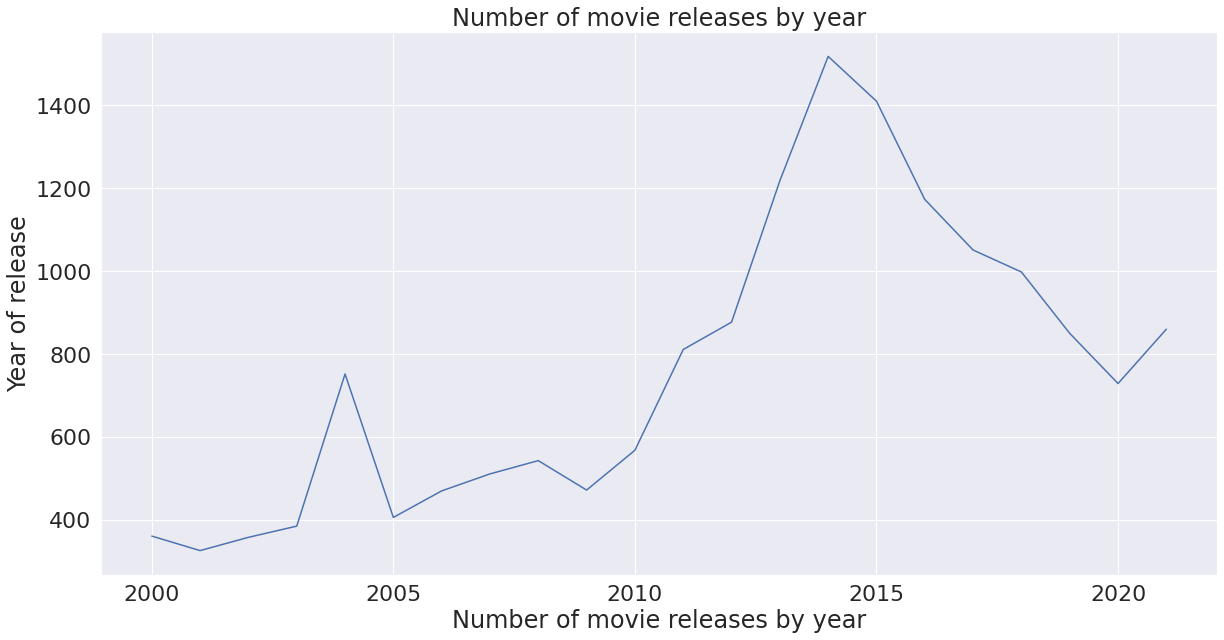

In [13]:
year_release = df.groupby('개봉년도').size()
sns.set_style('whitegrid')
sns.set(font_scale = 2, rc = {'figure.figsize':(20,10)})
year_p = sns.lineplot(data=year_release)
year_p.set_title('Number of movie releases by year')
year_p.set_xlabel('Number of movie releases by year')
year_p.set_ylabel('Year of release')

# 평점간의 상관관계
수업에서 사용했던 pairplot을 사용했습니다.  
세가지 비교 다 원하는 만큼의 상관관계를 얻지 못하였습니다.  
특히 관람객은 네티즌이 네이버에서 예매를 했을 분 네티즌과 사실상 같은 속성의 값이므로 실망스러운 결과였습니다.
  
이것의 원인이 평가에 참여한 인원이 적을경우 개인의 특성이 도드라지게 나타나기 때문이라고 생각했습니다.

관람객 평점의 왜도 :  -1.573513109187858
평론가 평점의 왜도 :  -0.473557575797767
네티즌 평점의 왜도 :  -1.1219533734220501
-------
관람객 평점의 첨도 :  4.994800749929688
평론가 평점의 첨도 :  0.736248686934208
네티즌 평점의 첨도 :  1.3345879104639424


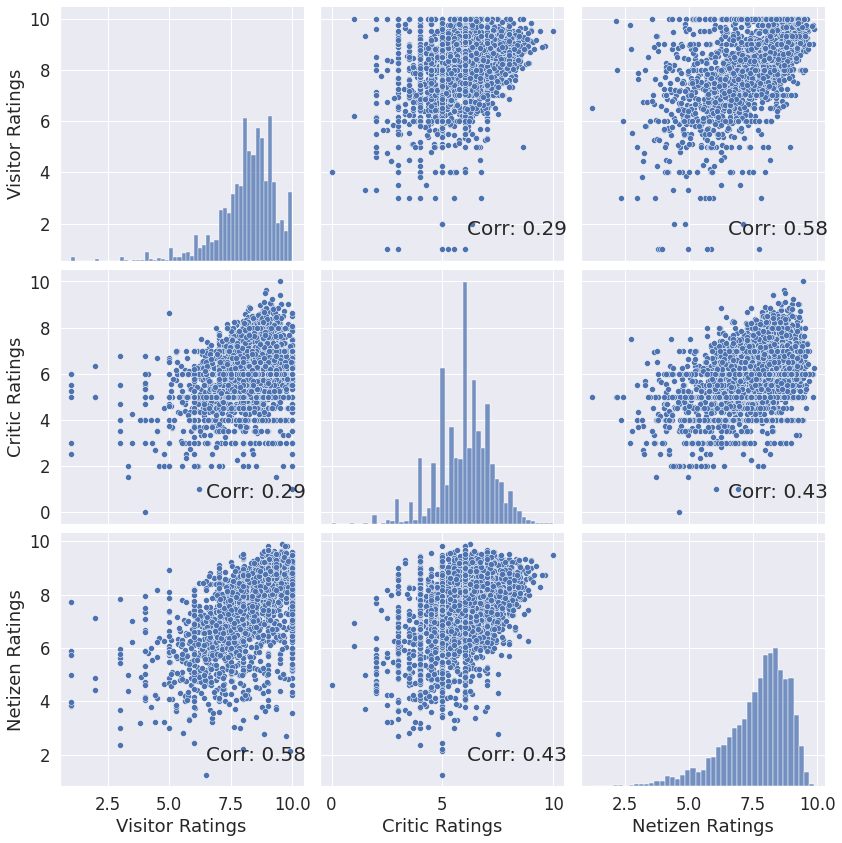

In [14]:
df_target = df_dropna.copy()
col_name = ['Movie name', 'Year of release', 'Visitor Ratings', 'Critic Ratings', 'Netizen Ratings', 'Number of visitors', 'Number of critics', 'Number of netizens']
df_target.columns = col_name
targetVar = ['Visitor Ratings', 'Critic Ratings', 'Netizen Ratings']
df_target = df_target[targetVar]

sns.set(font_scale=1.5)
g = sns.pairplot(df_target, height = 4)

corrValue = df_target.corr(method='pearson').values
for i, (ax, cv) in enumerate(zip(g.axes.flat, corrValue.flatten())):
  if i%4 == 0:
    continue
  YB = ax.get_ybound()
  XB = ax.get_xbound()
  Y = YB[0] + (YB[1] - YB[0])* 1/10
  X = XB[0] + (XB[1] - XB[0])* 3/5
  ax.text(X, Y, "Corr: %0.2f"%cv , fontsize = 20)

print('관람객 평점의 왜도 : ', df_target['Visitor Ratings'].skew())
print('평론가 평점의 왜도 : ', df_target['Critic Ratings'].skew())
print('네티즌 평점의 왜도 : ', df_target['Netizen Ratings'].skew())
print('-------')
print('관람객 평점의 첨도 : ', df_target['Visitor Ratings'].kurtosis())
print('평론가 평점의 첨도 : ', df_target['Critic Ratings'].kurtosis())
print('네티즌 평점의 첨도 : ', df_target['Netizen Ratings'].kurtosis())

# 평점 간의 상관관계 (네티즌 5000명 이상)
따라서 네티즌 기준으로 5000명 이상이 평가했다는 조건을 달았습니다.
네이버 영화 사이트에서 관람객은 사실상 네이버에서 예매를 했을 뿐 네티즌과 크게 다르지 않습니다.  
따라서 관람객과 네티즌의 상관관계는 상당히 선형적인 모습으로 결과가 나왔습니다.   
&nbsp;  

평론가와 관람객 또는 평론가과 네티즌의 상관관계는 약한 상관관계로 나왔으며
제가 원하는 정도로 비례하는 결과가 나오지는 않았습니다.  
&nbsp;  

평론가의 평점은 왜도와 첨도 둘 다 0에 가깝고 따라서 정규분포와 가까운 모습을 하고 있습니다.  
관람객과 네티즌 평점은 중심이 정규 분포보다 살짝 오른쪽으로 치우쳐져 있습니다.  
왜도 값은 각각 -1.13, -1.25로 -2~2 사이에 있으므로 왜도가 크지 않다고 판단됩니다.  
첨도 값은 각각 2, 1.57로 평균을 중심으로 값이 조금 몰려있는 것을 확인 할 수 있습니다.  
하지만 첨도 값이 3보다 작으므로 문제되지 않을거라 판단됩니다.  

대체로 관람객과 네티즌은 점수를 후하게 주는 경향이 있는 것 같습니다.  

참고한 사이트  
https://m.blog.naver.com/yk60park/222100758577  
https://rucrazia.tistory.com/65

관람객 평점의 왜도 :  -1.127652286272295
평론가 평점의 왜도 :  -0.12208992611116007
네티즌 평점의 왜도 :  -1.247183395969185
-------
관람객 평점의 첨도 :  2.0040389670108523
평론가 평점의 첨도 :  0.058002442342214966
네티즌 평점의 첨도 :  1.5653394619547107


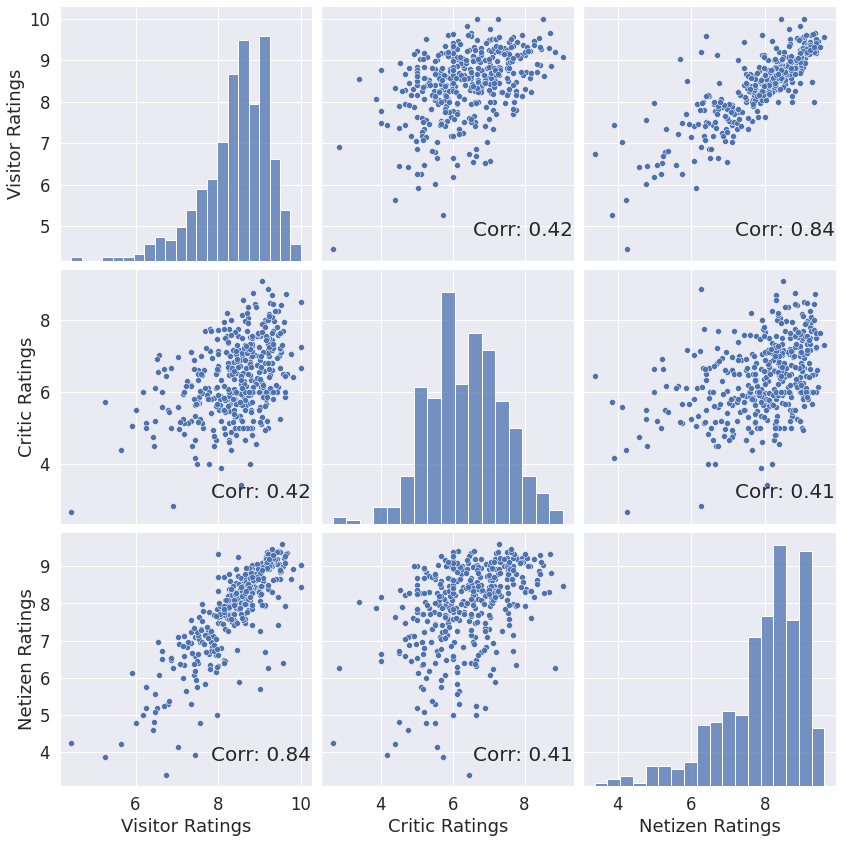

In [15]:
df_target = df_dropna[df_dropna['평가한 네티즌 수']>5000]
col_name = ['Movie name', 'Year of release', 'Visitor Ratings', 'Critic Ratings', 'Netizen Ratings', 'Number of visitors', 'Number of critics', 'Number of netizens']
df_target.columns = col_name
targetVar = ['Visitor Ratings', 'Critic Ratings', 'Netizen Ratings']
df_target = df_target[targetVar]

sns.set(font_scale=1.5)
g = sns.pairplot(df_target, height = 4)

corrValue = df_target.corr(method='pearson').values
for i, (ax, cv) in enumerate(zip(g.axes.flat, corrValue.flatten())):
  if i%4 == 0:
    continue
  YB = ax.get_ybound()
  XB = ax.get_xbound()
  Y = YB[0] + (YB[1] - YB[0])* 1/10
  X = XB[0] + (XB[1] - XB[0])* 3/5
  ax.text(X, Y, "Corr: %0.2f"%cv , fontsize = 20)

print('관람객 평점의 왜도 : ', df_target['Visitor Ratings'].skew())
print('평론가 평점의 왜도 : ', df_target['Critic Ratings'].skew())
print('네티즌 평점의 왜도 : ', df_target['Netizen Ratings'].skew())
print('-------')
print('관람객 평점의 첨도 : ', df_target['Visitor Ratings'].kurtosis())
print('평론가 평점의 첨도 : ', df_target['Critic Ratings'].kurtosis())
print('네티즌 평점의 첨도 : ', df_target['Netizen Ratings'].kurtosis())

# 히스토그램
히스토그램으로 관람객과 평론가와 네티즌의 평점분포를 확인해보면 다음과 같습니다.  
seaborn의 distplot()을 사용했습니다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

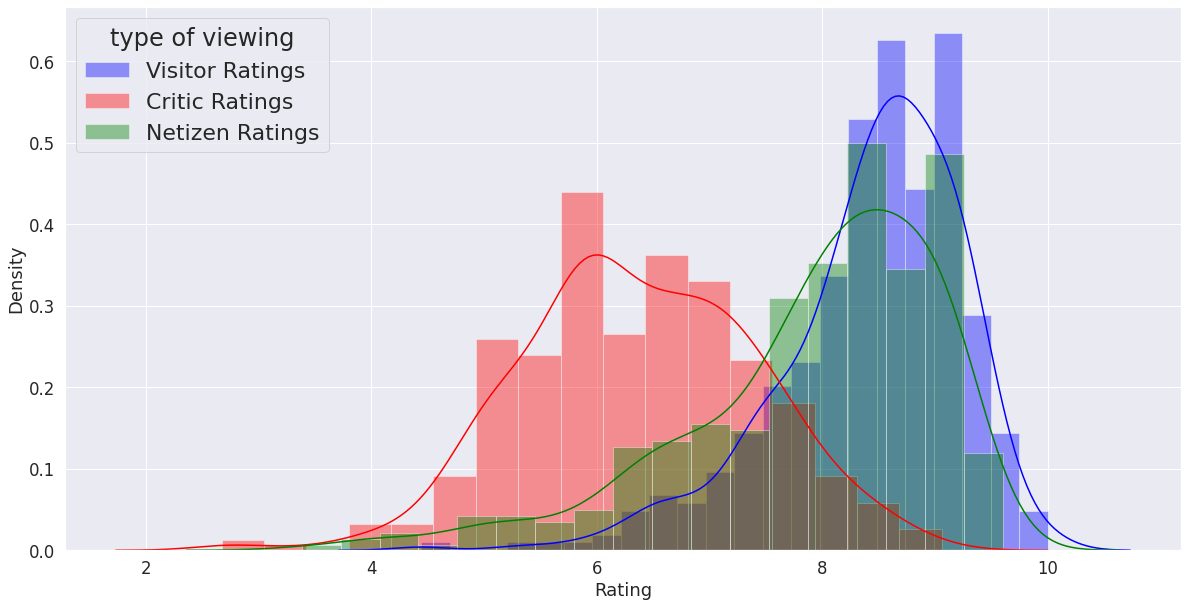

In [16]:
sns.distplot(df_target['Visitor Ratings'], color = 'blue', label = 'Visitor Ratings')
sns.distplot(df_target['Critic Ratings'], color = 'red', label = 'Critic Ratings')
p = sns.distplot(df_target['Netizen Ratings'], color = 'green', label = 'Netizen Ratings')
sns.set(font_scale = 2, rc = {'figure.figsize':(20,10)})
p.set_xlabel('Rating')
plt.legend(title='type of viewing')
plt.show()

# DASH
과제때 했던 코드를 기반으로 작성했습니다.  
드롭다운 목록 밑에 드롭다운에서 선택한 그래프를 그리고 그 밑에는 전체 데이터표가 있습니다.  
그래프는 앞서 보여드렸던 그래프들을 plotly로 구현한 것 뿐입니다.


In [ ]:
!pip install dash
!pip install dash_table
!pip install jupyter_dash

전체 데이터 표에서 행 상단에 있는 화살표를 누르시면 열 속성에 맞춰서 오름차순, 내림차순, 적용X 순으로 적용 가능합니다.  

또한 그 밑에서 특정 항목을 찾아볼 수 있는데, 예를 들어 영화 이름에 스파이더맨을 치시면 스파이더맨 영화들이 나오거나, 개봉년도에 =2000을 치시면 2000년 영화가 나오고 평가한 네티즌 수에 >5000 을 치시면 네티즌 5000명 이상 평가한 항목들만 남습니다.

In [24]:
import dash
from dash import dash_table as dt
from dash import html
import plotly.graph_objects as go
from dash import dcc
import plotly.express as px
import plotly.figure_factory as ff
from dash.dependencies import Input, Output

from jupyter_dash import JupyterDash

year_rel = year_release.reset_index(name='영화 수')


app = JupyterDash()



app.layout = html.Div(id = 'parent',
                      children = [html.H1(id = 'H1', children = '혹시 영화 좋아하세요?',
                                          style = {'textAlign':'center',\
                                                   'marginTop':40,
                                                   'marginBottom':40}),
                                  dcc.Dropdown(id = 'dropdown1',
                                               options = [{'label' : '연도별 영화 개봉 변이', 'value':1},
                                                          {'label' : '평점 간의 상관관계 (네티즌 5000명 이상)', 'value':2},
                                                          {'label' : '평점 히스토그램', 'value':3}],
                                                          value = 1),
                                  dcc.Graph(id = 'plot'),

                                  html.Br(),
                                  dt.DataTable(
                                                id='table',
                                                columns=[{"name": i, "id": i} for i in df.columns],
                                                data=df.to_dict('records'),
                                                filter_action="native",
                                                sort_action="native",
                                                sort_mode="multi",
                                                column_selectable="single",
                                                row_selectable="multi",
                                                selected_columns=[],
                                                selected_rows=[],
                                                page_action="native",
                                                page_current= 0,
                                                page_size= 10,),
                                  ])


@app.callback(Output(component_id='plot', component_property= 'figure'),
              [Input(component_id='dropdown1', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    if dropdown_value == 1:
      fig = px.line(year_rel, x='개봉년도', y='영화 수')
    elif dropdown_value == 2:
      fig = px.scatter_matrix(df_target, dimensions=['Visitor Ratings', 'Critic Ratings', 'Netizen Ratings'])
    else:
      hist_data = [df_target['Visitor Ratings'],df_target['Critic Ratings'],df_target['Netizen Ratings']]
      group_labels = ['Visitor Ratings', 'Critic Ratings', 'Netizen Ratings']
      fig = ff.create_distplot(hist_data, group_labels, bin_size=0.2,
            curve_type='kde',
            colors=None,
            rug_text=None,
            histnorm='probability density',
            show_hist=True,
            show_curve=True,
            show_rug=True,)
      
    return fig  

if __name__ == '__main__': 
    app.run_server()

Dash app running on:


<IPython.core.display.Javascript object>

# Selenium 맛보기
제가 어떤 과정으로 데이터를 가져왔는지 설명하기 위해서 작성했습니다.    
원래 주제는 음악사이트 관련 주제였지만 도중에 영화로 주제를 바꿨습니다.  
도중에 영화로 전환해서 그냥 selenium을 그대로 사용하게 되었고 작성했던 코드가 아까워서 한번 작성해봤습니다.  

멜론에서 앨범 제목들을 가져오려고 했는데 멜론은 자바스크립트로 되어 있어서 beautifulsoup 대신 selenium을 사용했습니다.  
크롤링한 멜론 사이트 : https://www.melon.com/artistplus/finder/index.htm  
저희는 여기서 각 아티스트의 id를 크롤링 해 올겁니다.  

영화 크롤링 코드는 주소를 올리겠습니다.
https://github.com/SeokHwanJeong/DAP__/tree/main/project_movie

제가 짰던 코드를 그대로 가져왔지만 코랩에서 실행시키기 위해서 수정을 조금 했습니다.

[Python] 구글 코랩(Google Colaboratory)에서 Selenium 사용하기  
출처 : https://pgh268400.tistory.com/286

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

In [20]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

In [21]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# id 추출
아티스트마다 고유한 id가 있는데 그 아이디를 크롤링해와서 나중에 링크에 넣어서 링크로 이동할 예정입니다.  
셀레니움에서는 find_element()를 이용해서 엘리먼트를 가져오는데, 그 특정 엘리먼트를 By.ID, By.NAME, By.XPATH 등등 아이디나 태그나 클레스 등등 그 찾을 수 있는 특징으로 특정 엘리먼트를 가져와서 값을 크롤링 할 수 있습니다.  
장점으로는 실제 웹페이지를 실행시켜서 돌아가기 때문에, 자바스크립트같은 동적인 페이지도 긁어올 수 있습니다.

In [22]:
driver = webdriver.Chrome('chromedriver', options=options)
driver.implicitly_wait(10)
URL = "https://www.melon.com/artistplus/finder/index.htm"

driver.get(URL) #멜론 아티스트 파인더 사이트
driver.find_element_by_id("GN0300").click() #장르에서 국내힙합 클릭
driver.find_element(By.XPATH, '//*[@id="conts"]/div[2]/div[1]/dl[5]/dd/label[2]/input').click() #세부장르에서 랩 스타일 클릭

def next_page(driver):
    #페이지 이동
    page_bar = driver.find_element(By.CLASS_NAME, 'paginate') # 페이지바
    pages = page_bar.find_elements(By.CSS_SELECTOR, 'a')      # 페이지바에서 a태그들을 가져옵니다.(현재 페이지를 제외한 페이지 숫자들)
    page_now = page_bar.find_elements(By.CSS_SELECTOR, 'strong')[0].text # 현재 페이지
    
    # a태그중에 '맨처음', '이전', '맨끝' 이면 패스
    # 페이지 숫자들 중 현재페이지보다 작으면 패스, 크면 그 페이지로 이동
    # 만약 '다음'이면 누를수 있는지 확인하고 누를 수 있으면 이동, 없으면 True 반환
    for page in pages:
        page_num = page.text.strip()
        if page_num in ['맨처음', '이전', '맨끝']:
            pass
        elif page_num == '다음':
            if page.get_attribute("class") == "btn_next disabled":
                return True
            else:
                page.send_keys("\n")
                time.sleep(1)
                return False
        elif int(page_num) > int(page_now):
            page.send_keys("\n")
            time.sleep(1)
            return False
        else:
            pass
    
# 위 줄 ㄱㄴㄷㄹ...중에 클릭
def above_click_alpha(driver, num):
    xpath = "//*[@id='conts']/div[1]/dl/dd/div[1]/button["+ str(num) +"]"
    driver.find_element(By.XPATH, xpath).click()
    time.sleep(1)
# 아래 줄 abcd...중에 클릭
def below_click_alpha(driver, num):
    xpath = "//*[@id='conts']/div[1]/dl/dd/div[2]/button["+ str(num) +"]"
    driver.find_element(By.XPATH, xpath).click()
    time.sleep(1)

# 팬맺기 버튼에 아티스트 id가 있어서 그걸 가져왔습니다.
def get_artist_id(driver):
    id_info = driver.find_elements(By.CLASS_NAME, 'btn_join_fan')
    for id in id_info:
        artist_id.append(id.get_attribute("data-artist-no"))
        # 가시성을 위해 이름 추가
        artist_name = id.get_attribute("title")
        artist_name = artist_name.replace(" 팬맺기","")
        print(artist_name, ' - ', id.get_attribute("data-artist-no"))
    

artist_id = []
# 윗줄 ㄱㄴㄷㄹ... ㄱ=1 ~ 기타=16
'''for i in range(1, 17):
    above_click_alpha(driver, i)
    #페이지 이동하면서 아티스트들의 id를 얻는다
    is_done = False
    while(not is_done):
        get_artist_id(driver)
        is_done = next_page(driver)'''
    
# 아랫줄 ABCD... A=1 ~ Z = 26
# 저희는 Z만 볼겁니다.
for i in range(26, 27):
    below_click_alpha(driver, i)
    #페이지 이동하면서 아티스트들의 id를 얻는다
    is_done = False
    while(not is_done):
        get_artist_id(driver)
        is_done = next_page(driver)

#중복 제거
temp = set(artist_id)
artist_id = list(temp)

print(artist_id)
driver.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  


Zion.T  -  537920
Zior Park  -  2085020
ZENE THE ZILLA  -  991470
Zayvo (제이보)  -  2560785
ZELO (젤로)  -  588495
Zero (제로)  -  1183982
zzuno だいすき!  -  1759544
ZIVN(지안)  -  2944509
ZIDA-B(지다비)  -  2763986
Z'Poet  -  292466
Zaddyllusion  -  2902894
Zero Gravity in the City  -  2935244
Zeemen  -  716044
['2902894', '716044', '588495', '2085020', '537920', '991470', '2560785', '1759544', '2944509', '2763986', '2935244', '1183982', '292466']


# 앨범 이름 추출
앞서 구했던 id로 아티스트의 앨범 링크로 이동하여 앨범들을 긁어옵니다.

In [23]:
# 아티스트 이름과, 앨범 이름을 가져와서 추가하는 함수입니다. 쇼미랑 고등래퍼는 뺐습니다.
def now_page_elbum_get(driver):
    try:
        name = driver.find_element(By.XPATH, '//*[@id="conts"]/div[1]/div/div[2]/p')
        elbums = driver.find_elements(By.XPATH, '//*[@id="frm"]/div/ul/li[*]/div/div/dl/dt/a')
        
        for el in elbums:
            if [el.text, name.text] not in elbum_data:
                if "쇼미더머니" not in el.text and "고등래퍼" not in el.text:
                    elbum_data.append([el.text, name.text])
                    #write.writerow([el.text, name.text])
                    print(el.text, ' - ', name.text)
            else:
                global error_count
                error_count += 1
    except:
        pass

driver = webdriver.Chrome('chromedriver', options=options)
elbum_data=[]

# 아까 얻었던 아티스트 id로 아티스트들의 앨범창으로 이동합니다.
for id in artist_id:
    url = f"https://www.melon.com/artist/album.htm?artistId={id}"
    driver.get(url)

    time.sleep(1)
    is_done = False
    error_count = 0
    while(not is_done):
      now_page_elbum_get(driver)
      is_done = next_page(driver)

driver.close()
print(elbum_data)
print('--------------------end----------------------')
print('감사합니다.')

Raudillusion  -  Zaddyllusion
R E S E T (LIVE EDIT)  -  Zeemen
AMENIIA VARIOUS ARTISTS SERIES 001  -  Zeemen
R E S E T  -  Zeemen
Captain  -  Zeemen
Sixteen Days  -  Zeemen
Volt Age Sound 6V  -  Zeemen
Volt Age Sound 3v  -  Zeemen
Volt Age Sound 2v  -  Zeemen
Volt Age Sound 1V  -  Zeemen
Back On The Road  -  ZELO (젤로)
ON A ROLL  -  ZELO (젤로)
BLAME  -  ZELO (젤로)
SCARECROW  -  ZELO (젤로)
Mi Amor  -  ZELO (젤로)
Day2Day  -  ZELO (젤로)
DISTANCE  -  ZELO (젤로)
B.A.P CONCERT SPECIAL SOLO 'THE RECOLLECTION'  -  ZELO (젤로)
EGO  -  ZELO (젤로)
BLUE  -  ZELO (젤로)
DAE HYUN X JONG UP PROJECT ALBUM 'PARTY BABY'  -  ZELO (젤로)
ROSE  -  ZELO (젤로)
NOIR  -  ZELO (젤로)
PUT'EM UP  -  ZELO (젤로)
CARNIVAL  -  ZELO (젤로)
MATRIX  -  ZELO (젤로)
어디니? 뭐하니?  -  ZELO (젤로)
First Sensibility  -  ZELO (젤로)
Badman  -  ZELO (젤로)
Hurricane  -  ZELO (젤로)
Coffee Shop  -  ZELO (젤로)
ONE SHOT  -  ZELO (젤로)
빗소리  -  ZELO (젤로)
하지마  -  ZELO (젤로)
대박사건  -  ZELO (젤로)
NO MERCY  -  ZELO (젤로)
Goodbye  -  ZELO (젤로)
Power  -  ZELO (젤로)
WARRIOR  -  

# 후기
먼저 부족한 제 코드를 끝까지 봐주셔서 감사합니다.

## 아쉬운점
처음 제가 생각한 주제는 2가지 였습니다.  
둘 다 그저 깊게 생각하지 않고 제 흥미 위주로 고른 주제였습니다.  
힙합 앨범 평점과 힙합 커뮤니티 반응의 상관관계와   
영화 평론가와 관람객 평점의 상관관계였습니다.

원래는 힙합 앨범 평점과 힙합 커뮤니티 반응을 하려고 했습니다.  
그런데 제 생각보다 힙합음악을 하는 사람이 워낙 많았고, 앨범은 그 몇 배로 많았습니다.  
또한 멜론에서 크롤링을 하다보면, 멜론에서 ip를 막아서 이를 해결하는데 많은 시간을 썼습니다.  
앨범 이름까지는 긁어왔지만 양이 너무 방대했고, 제가 비교로 하려 했던 사이트인 리드머에서는 434개의 앨범 평가만 있었기에 분석이 힘들 것 같고 시간도 별로 안남았기에 주제를 영화로 바꿨습니다.

네이버에서는 ip가 막히는 일도 없었기 때문에 수월하게 데이터를 수집할 수 있었습니다.  
하지만 영화 평론가와 관람객 평점의 비교만 생각하고 골랐던 주제여서 수업 후반부에 배운 머신러닝에는 적절치 않은 데이터라고 수집 후 생각하게 되었습니다.  
데이터를 수집하기 전에 철저하게 계획과 목표를 세웠어야 하는데 그러지 못한 점이 아쉽습니다. 또한 상관관계도 만족스러운 결과로 나오지 않아 그 점도 아쉬운 것 같습니다.
&nbsp;   

긴 글 끝까지 읽어주셔서 감사합니다.  